In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys

In [3]:
project_path = '/datadisk2/qfeng/TextRecognitionDataGenerator'

In [4]:
if project_path not in sys.path:
    sys.path.append(project_path)

In [5]:
%cd $project_path
%pwd

/datadisk2/qfeng/TextRecognitionDataGenerator


'/datadisk2/qfeng/TextRecognitionDataGenerator'

In [61]:
from trdg.generators import GeneratorFromStrings

In [66]:
generator = GeneratorFromStrings(
    ['采购订单'],
    fonts=['/datadisk2/qfeng/TextRecognitionDataGenerator/trdg/fonts/cn/SimSun.ttf']
)

In [67]:
img, lbl = next(generator)

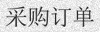

In [68]:
img

In [69]:
lbl

'采购订单'

In [70]:
from ..data_generator import FakeTextDataGenerator
from ..utils import load_dict, load_fonts


class GeneratorFromStrings:
    """Generator that uses a given list of strings"""

    def __init__(
        self,
        strings,
        count=-1,
        fonts=[],
        language="en",
        size=32,
        skewing_angle=0,
        random_skew=False,
        blur=0,
        random_blur=False,
        background_type=0,
        distorsion_type=0,
        distorsion_orientation=0,
        is_handwritten=False,
        width=-1,
        alignment=1,
        text_color="#282828",
        orientation=0,
        space_width=1.0,
        character_spacing=0,
        margins=(5, 5, 5, 5),
        fit=False,
    ):
        self.count = count
        self.strings = strings
        self.fonts = fonts
        if len(fonts) == 0:
            self.fonts = load_fonts(language)
        self.language = language
        self.size = size
        self.skewing_angle = skewing_angle
        self.random_skew = random_skew
        self.blur = blur
        self.random_blur = random_blur
        self.background_type = background_type
        self.distorsion_type = distorsion_type
        self.distorsion_orientation = distorsion_orientation
        self.is_handwritten = is_handwritten
        self.width = width
        self.alignment = alignment
        self.text_color = text_color
        self.orientation = orientation
        self.space_width = space_width
        self.character_spacing = character_spacing
        self.margins = margins
        self.fit = fit
        self.generated_count = 0

    def __iter__(self):
        return self

    def __next__(self):
        return self.next()

    def next(self):
        if self.generated_count == self.count:
            raise StopIteration
        self.generated_count += 1        
        return FakeTextDataGenerator.generate(
            self.generated_count,
            self.strings[(self.generated_count - 1) % len(self.strings)],
            self.fonts[(self.generated_count - 1) % len(self.fonts)],
            None,
            self.size,
            None,
            self.skewing_angle,
            self.random_skew,
            self.blur,
            self.random_blur,
            self.background_type,
            self.distorsion_type,
            self.distorsion_orientation,
            self.is_handwritten,
            0,
            self.width,
            self.alignment,
            self.text_color,
            self.orientation,
            self.space_width,
            self.character_spacing,
            self.margins,
            self.fit,
        ), self.strings[(self.generated_count - 1) % len(self.strings)]


ValueError: attempted relative import beyond top-level package